In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

import os
import time
import shutil
import pathlib
import itertools

In [2]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [3]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Greens):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

## Load the Chest X-rays dataset

In [4]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/README.md.txt
/kaggle/input/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-859.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-158.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-10121.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-1811.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-97.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-1088.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-5663.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-6328.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-8410.png
/kaggle/input/COVID

In [5]:
path = "../input/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

In [6]:
import pandas as pd 

dataset = []
levels = ['Normal/images', 'COVID/images','Lung_Opacity/images','Viral Pneumonia/images']

for id, enumerate_level in enumerate(levels):
    files = os.listdir(os.path.join(data_dir, enumerate_level))
    split_index = int(0.25 * len(files))
    for file in files[:split_index]:
        dataset.append(['{}/{}'.format(enumerate_level, file), enumerate_level])

dataset = pd.DataFrame(dataset, columns=['filename','label'])

In [7]:
dataset

filename                   label
0                        Normal/images/Normal-859.png           Normal/images
1                        Normal/images/Normal-158.png           Normal/images
2                      Normal/images/Normal-10121.png           Normal/images
3                       Normal/images/Normal-1811.png           Normal/images
4                         Normal/images/Normal-97.png           Normal/images
...                                               ...                     ...
5286   Viral Pneumonia/images/Viral Pneumonia-426.png  Viral Pneumonia/images
5287  Viral Pneumonia/images/Viral Pneumonia-1149.png  Viral Pneumonia/images
5288   Viral Pneumonia/images/Viral Pneumonia-467.png  Viral Pneumonia/images
5289   Viral Pneumonia/images/Viral Pneumonia-785.png  Viral Pneumonia/images
5290   Viral Pneumonia/images/Viral Pneumonia-698.png  Viral Pneumonia/images

[5291 rows x 2 columns]

In [8]:
dataset['label'] = dataset['label'].map({'Normal/images': 'Normal', 'COVID/images': 'COVID','Lung_Opacity/images':'Lung_Opacity','Viral Pneumonia/images':'Viral Pneumonia'})
dataset['path'] = path + '/' + dataset['filename']

In [9]:
dataset

filename            label  \
0                        Normal/images/Normal-859.png           Normal   
1                        Normal/images/Normal-158.png           Normal   
2                      Normal/images/Normal-10121.png           Normal   
3                       Normal/images/Normal-1811.png           Normal   
4                         Normal/images/Normal-97.png           Normal   
...                                               ...              ...   
5286   Viral Pneumonia/images/Viral Pneumonia-426.png  Viral Pneumonia   
5287  Viral Pneumonia/images/Viral Pneumonia-1149.png  Viral Pneumonia   
5288   Viral Pneumonia/images/Viral Pneumonia-467.png  Viral Pneumonia   
5289   Viral Pneumonia/images/Viral Pneumonia-785.png  Viral Pneumonia   
5290   Viral Pneumonia/images/Viral Pneumonia-698.png  Viral Pneumonia   

                                                   path  
0     ../input/COVID-19_Radiography_Dataset/Normal/i...  
1     ../input/COVID-19_Radiography_Dataset/Normal/i...  
2     ../input/COVID-19_Radiography_Dataset/Normal/i...  
3     ../input/COVID-19_Radiography_Dataset/Normal/i...  
4     ../input/COVID-19_Radiography_Dataset/Normal/i...  
...                                                 ...  
5286  ../input/COVID-19_Radiography_Dataset/Viral Pn...  
5287  ../input/COVID-19_Radiography_Dataset/Viral Pn...  
5288  ../input/COVID-19_Radiography_Dataset/Viral Pn...  
5289  ../input/COVID-19_Radiography_Dataset/Viral Pn...  
5290  ../input/COVID-19_Radiography_Dataset/Viral Pn...  

[5291 rows x 3 columns]

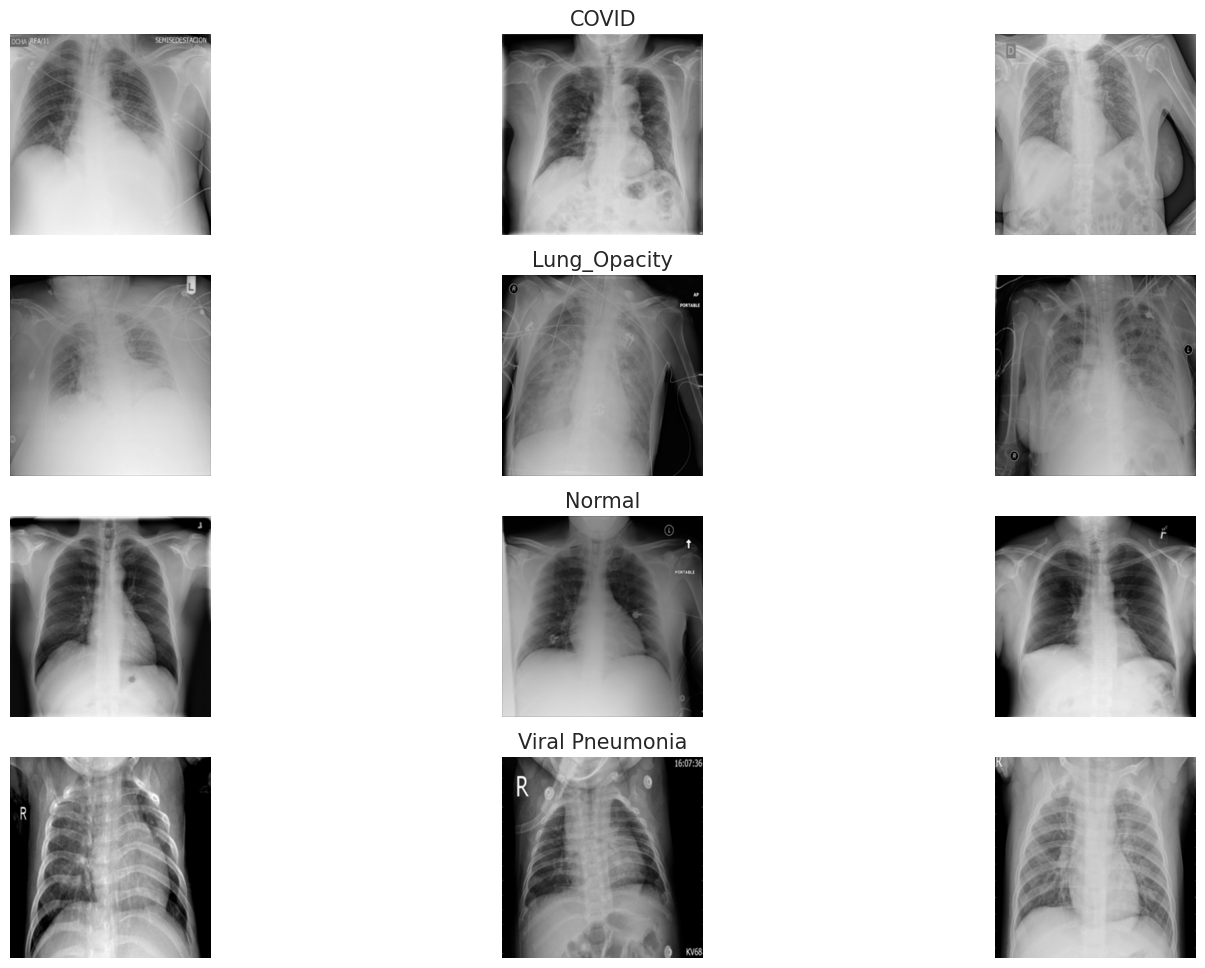

In [10]:
import matplotlib.pyplot as plt
import cv2

n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, dataset.sort_values(['label']).groupby('label')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

## Data Normalization

In [11]:
dataset['image'] = None

for i in range(0,len(dataset)):
    image_path = dataset['path'].iloc[i]
    image = cv2.imread(image_path)
    if image is not None:
        image=cv2.resize(image, (224, 224))
        image=np.asarray(image).astype('float32')
        normalized_image = image/255
        dataset.at[i, 'image'] = normalized_image

In [12]:
dataset

filename            label  \
0                        Normal/images/Normal-859.png           Normal   
1                        Normal/images/Normal-158.png           Normal   
2                      Normal/images/Normal-10121.png           Normal   
3                       Normal/images/Normal-1811.png           Normal   
4                         Normal/images/Normal-97.png           Normal   
...                                               ...              ...   
5286   Viral Pneumonia/images/Viral Pneumonia-426.png  Viral Pneumonia   
5287  Viral Pneumonia/images/Viral Pneumonia-1149.png  Viral Pneumonia   
5288   Viral Pneumonia/images/Viral Pneumonia-467.png  Viral Pneumonia   
5289   Viral Pneumonia/images/Viral Pneumonia-785.png  Viral Pneumonia   
5290   Viral Pneumonia/images/Viral Pneumonia-698.png  Viral Pneumonia   

                                                   path  \
0     ../input/COVID-19_Radiography_Dataset/Normal/i...   
1     ../input/COVID-19_Radiography_Dataset/Normal/i...   
2     ../input/COVID-19_Radiography_Dataset/Normal/i...   
3     ../input/COVID-19_Radiography_Dataset/Normal/i...   
4     ../input/COVID-19_Radiography_Dataset/Normal/i...   
...                                                 ...   
5286  ../input/COVID-19_Radiography_Dataset/Viral Pn...   
5287  ../input/COVID-19_Radiography_Dataset/Viral Pn...   
5288  ../input/COVID-19_Radiography_Dataset/Viral Pn...   
5289  ../input/COVID-19_Radiography_Dataset/Viral Pn...   
5290  ../input/COVID-19_Radiography_Dataset/Viral Pn...   

                                                  image  
0     [[[0.019607844, 0.019607844, 0.019607844], [0....  
1     [[[0.19215687, 0.19215687, 0.19215687], [0.258...  
2     [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
3     [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
4     [[[0.35686275, 0.35686275, 0.35686275], [0.392...  
...                                                 ...  
5286  [[[0.12156863, 0.12156863, 0.12156863], [0.545...  
5287  [[[0.05882353, 0.05882353, 0.05882353], [0.062...  
5288  [[[0.05490196, 0.05490196, 0.05490196], [0.078...  
5289  [[[0.24313726, 0.24313726, 0.24313726], [0.188...  
5290  [[[0.1882353, 0.1882353, 0.1882353], [0.180392...  

[5291 rows x 4 columns]

In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform the 'label' column
dataset['label_encoded'] = encoder.fit_transform(dataset['label'])

# One-hot encode the 'label_encoded' column
one_hot_labels = to_categorical(dataset['label_encoded'], num_classes=4)

In [14]:
one_hot_labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

## Data Split

In [15]:
from sklearn.model_selection import train_test_split
X = dataset['image'].values
y = one_hot_labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y)

# Further split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)

In [16]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(3703,) (3703, 4) (794,) (794, 4) (794,) (794, 4)


In [17]:
print("Image shape:",dataset['image'][0].shape)

Image shape: (224, 224, 3)


## 3- MobileNetV2 (x0.5) with ImageNet pretrained weights

In [18]:
import tensorflow as tf
from keras.applications import MobileNetV2

based_model = MobileNetV2(input_shape=(224, 224, 3),alpha=0.5, weights='imagenet', include_top=False)
based_model.summary()

3201480/3201480 [==============================] - 0s 0us/step
Model: "mobilenetv2_0.50_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                

In [19]:
model = keras.Sequential(
    [
        based_model,
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(4, activation="softmax"),
    ]
)

In [20]:
# 6. Total Parameters

total_params = model.count_params()
print(f"Total Parameters: {total_params}")

Total Parameters: 65459380


In [21]:
# 7. Print Architecture

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.50_224 (Funct  (None, 7, 7, 1280)       706224    
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 65,459,380
Trainable params: 65,440,836
Non-trainable params: 18,544
_______________________________________

In [22]:
X_train = np.array(X_train.tolist())
X_val = np.array(X_val.tolist())

In [23]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [24]:
# 8. Retrain with Transfer Learning

def train_model(model, X_train, y_train, X_val, y_val):

    # Compile and train model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    print(model.summary())

    history = model.fit(
       X_train,  y_train ,validation_data= (X_val, y_val), epochs= 20, batch_size= 64
     )
    return history

# define a function to set number of trainable layers
def set_trainable_layers( based_model, trainable_layers):
    # Freeze base model layers
    
    for layer in based_model.layers:
        layer.trainable = False
    # Unfreeze specific layers
    if trainable_layers == 4:
        for layer in based_model.layers[-3:]:
            layer.trainable = True
            print(f"Layer {layer.name} is trainable")
    elif trainable_layers == 5:
        for layer in based_model.layers[-5:]:
            layer.trainable = True
            print(f"Layer {layer.name} is trainable")

    model = keras.Sequential(
    [
        based_model,
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(4, activation="softmax"),
    ]
    )

    return model

model1 = set_trainable_layers(  based_model , trainable_layers=3 ) # Last 3 FC layers
model2 = set_trainable_layers( based_model , trainable_layers=4 ) # 1 Conv + 3 FC layers
model3 = set_trainable_layers( based_model , trainable_layers=5)  # 2 Conv + 3 FC layers

# Train with different sets of trainable layers
history_3 = train_model(model1,X_train, y_train, X_val, y_val)  # Last 3 FC layers
history_4 = train_model(model2, X_train, y_train, X_val, y_val)  # 1 Conv + 3 FC layers
history_5 = train_model(model3, X_train, y_train, X_val, y_val)  # 2 Conv + 3 FC layers

Layer Conv_1 is trainable
Layer Conv_1_bn is trainable
Layer out_relu is trainable
Layer block_16_project is trainable
Layer block_16_project_BN is trainable
Layer Conv_1 is trainable
Layer Conv_1_bn is trainable
Layer out_relu is trainable
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.50_224 (Funct  (None, 7, 7, 1280)       706224    
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              64226304  
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (D

In [25]:
model1.save(f'saved_model/Model{1}.h5', save_format="h5")
model2.save(f'saved_model/Model{2}.h5', save_format="h5")
model3.save(f'saved_model/Model{3}.h5', save_format="h5")

In [26]:
!ls /kaggle/working/saved_model
from IPython.display import FileLink
display(FileLink("saved_model/Model1.h5"))
display(FileLink("saved_model/Model2.h5"))
display(FileLink("saved_model/Model3.h5"))

Model1.h5  Model2.h5  Model3.h5


/kaggle/working/saved_model/Model1.h5

/kaggle/working/saved_model/Model2.h5

/kaggle/working/saved_model/Model3.h5

Model_1


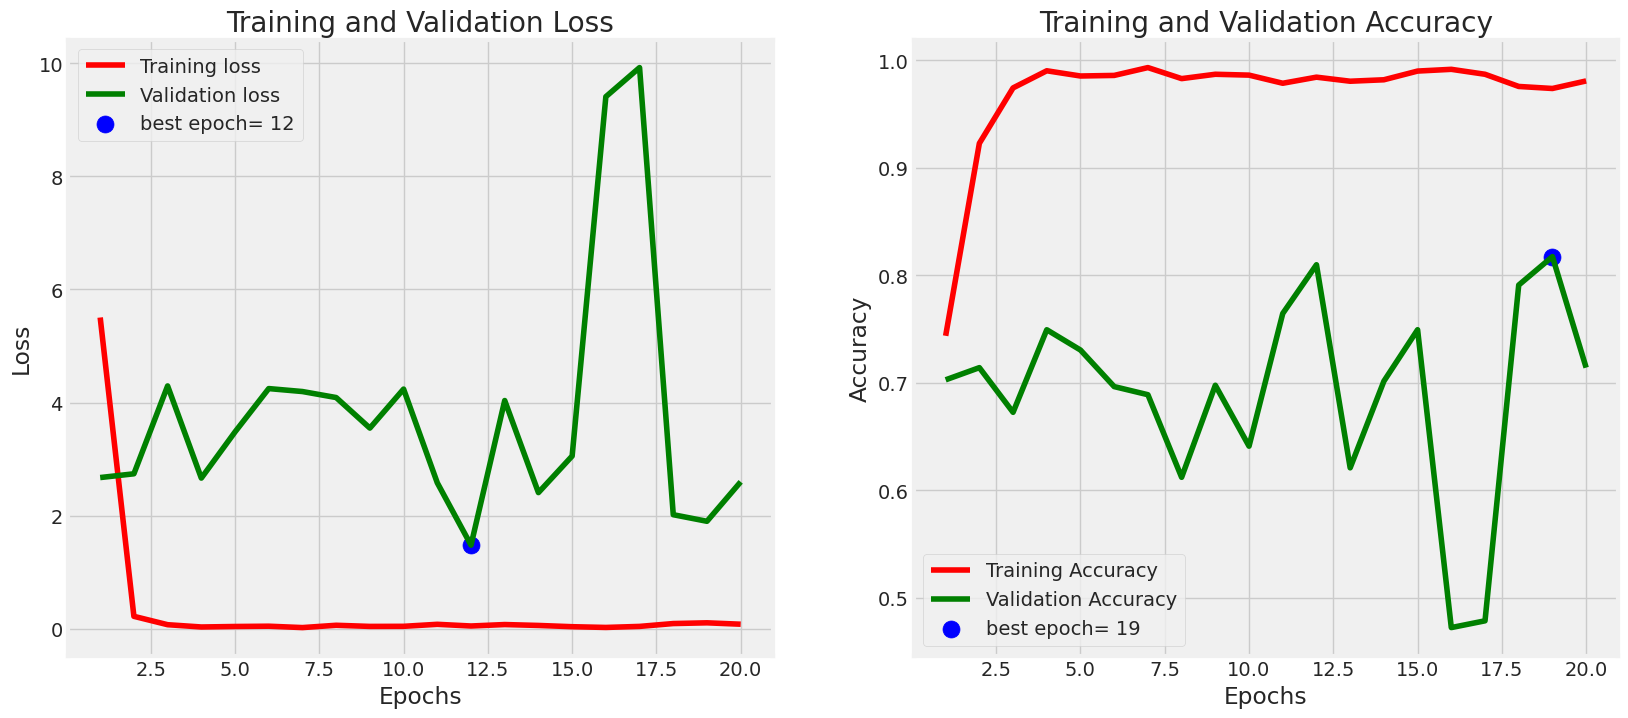

Model_2


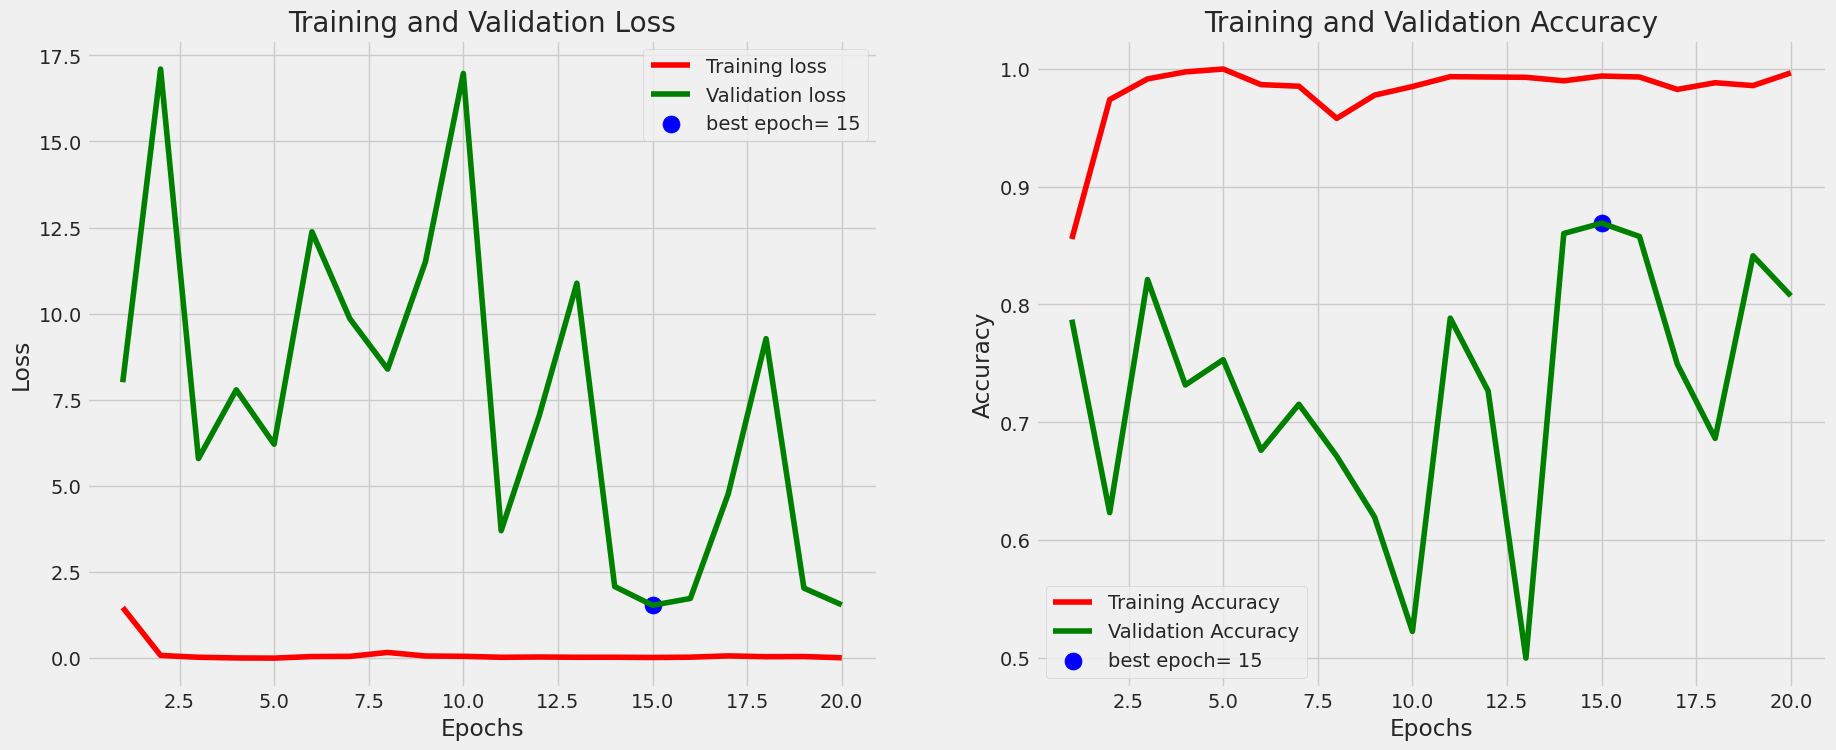

Model_3


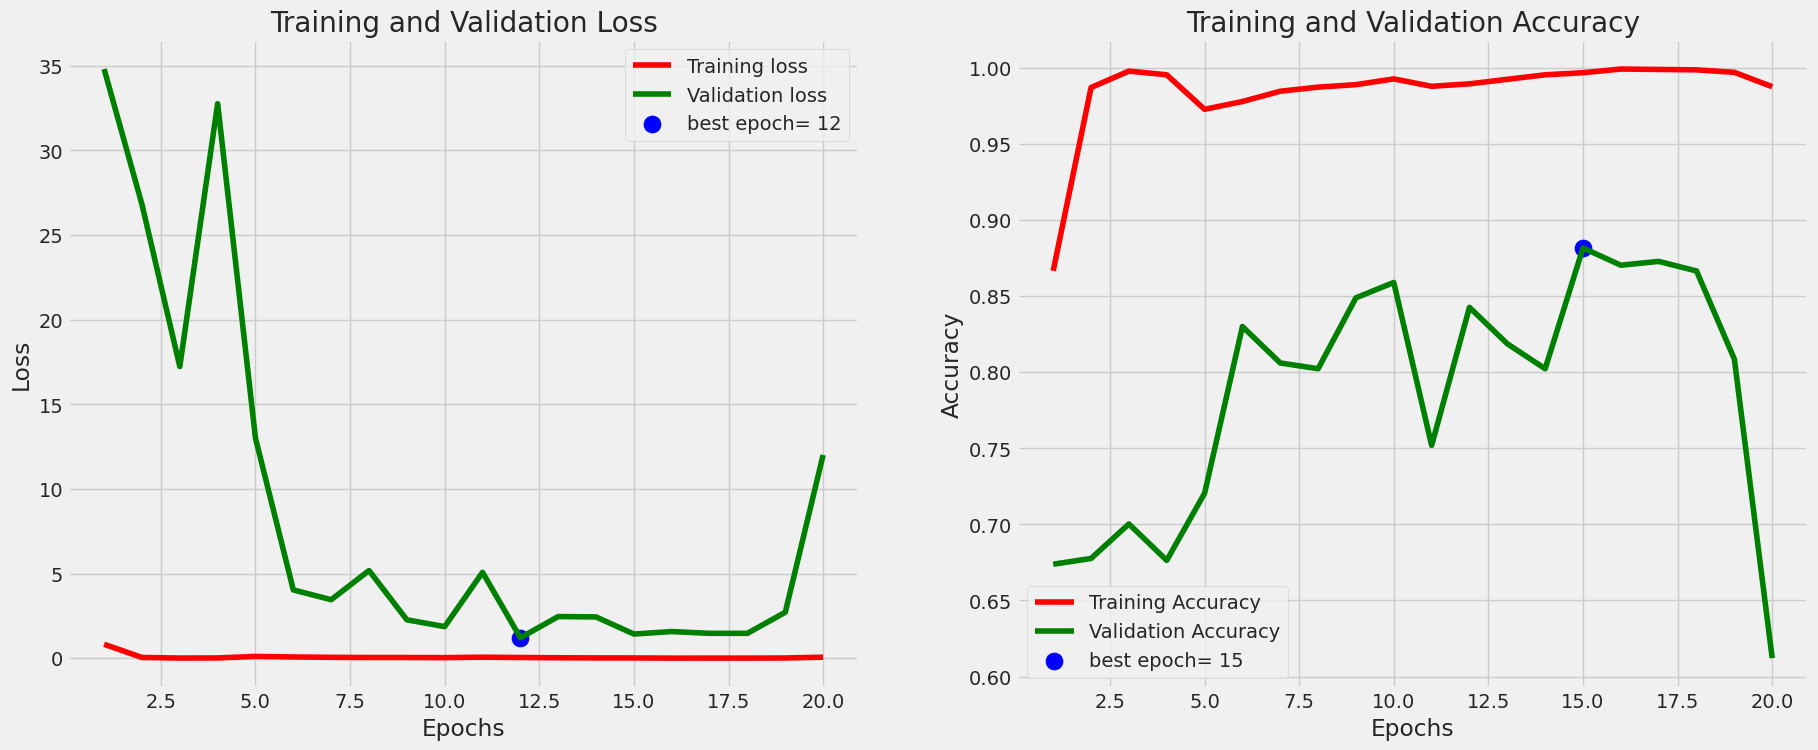

In [27]:
history = [history_3, history_4, history_5 ]
i = 1
for his in history:
    print(f'Model_{i}')
    plot_training(his)
    i+=1

In [28]:
from numpy import argmax

# Get the predictions from the model
y_pred = model.predict(X_val)

# Convert the predictions from categorical back to original
y_pred = argmax(y_pred, axis=1)

25/25 [==============================] - 2s 19ms/step


In [29]:
based_model.summary()

Model: "mobilenetv2_0.50_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                              

In [32]:
X_test = np.array(X_test.tolist())

In [33]:
models = [model1, model2, model3]
i =1
for model in models:
    ts_length = len(X_test)
    test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    train_score = model.evaluate(X_train, y_train , steps= test_steps, verbose= 1)
    valid_score = model.evaluate(X_val,y_val, steps= test_steps, verbose= 1)
    test_score = model.evaluate(X_test,y_test, steps= test_steps, verbose= 1)
    print(f"===========model_{i}==============" )
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print("=========================" )
    i+=1

397/397 [==============================] - 4s 10ms/step - loss: 1.9237 - accuracy: 0.7368
===========model_1==============
Train Loss:  1.4006093740463257
Train Accuracy:  0.7709965109825134
--------------------
Validation Loss:  2.1110680103302
Validation Accuracy:  0.7191435694694519
--------------------
Test Loss:  1.9236869812011719
Test Accuracy:  0.736775815486908
397/397 [==============================] - 4s 10ms/step - loss: 3.1086 - accuracy: 0.7758
===========model_2==============
Train Loss:  1.9228416681289673
Train Accuracy:  0.8128544688224792
--------------------
Validation Loss:  3.1611168384552
Validation Accuracy:  0.75944584608078
--------------------
Test Loss:  3.1086182594299316
Test Accuracy:  0.7758186459541321
397/397 [==============================] - 4s 10ms/step - loss: 10.4520 - accuracy: 0.6373
===========model_3==============
Train Loss:  9.373612403869629
Train Accuracy:  0.6621658205986023
--------------------
Validation Loss:  12.003978729248047
Valida

In [34]:
Preds = {}
i = 1
for model in models:
    preds = model.predict_generator(X_test)
    y_pred = np.argmax(preds, axis=1)
    Preds[f"Model{i}"] = y_pred
    i+=1

print(Preds)

{'Model1': array([0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1,
       0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 3, 0, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 3, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 

In [43]:
y_test

array([0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 3, 2, 1, 1, 2, 2, 0, 1, 1, 0,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0,
       2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 3, 1, 2, 3, 2, 2, 1, 1, 0, 1, 0, 3, 2, 1, 2, 3, 3,
       1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2,
       2, 3, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 2, 2, 3, 1,
       3, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 3, 1, 3, 2, 0, 2, 1, 1, 1, 2, 2,
       0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1,
       0, 1, 0, 3, 2, 2, 1, 1, 2, 2, 2, 1, 3, 3, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1,
       2, 0, 1, 3, 2, 0, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       3, 2, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 0, 1, 0,

In [41]:
y_pred

array([0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1,
       0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 3, 0, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 3, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1,

===============Model 1===============
Confusion Matrix, Without Normalization
[[118   9   8   0]
 [ 11 151  64   0]
 [ 72   5 306   0]
 [ 21   6  13  10]]
              precision    recall  f1-score   support

     Class 1       0.53      0.87      0.66       135
     Class 2       0.88      0.67      0.76       226
     Class 3       0.78      0.80      0.79       383
     Class 4       1.00      0.20      0.33        50

    accuracy                           0.74       794
   macro avg       0.80      0.64      0.64       794
weighted avg       0.78      0.74      0.73       794

===============Model 2===============
Confusion Matrix, Without Normalization
[[114  10  11   0]
 [  7 184  35   0]
 [ 57  23 303   0]
 [ 26   8   1  15]]
              precision    recall  f1-score   support

     Class 1       0.56      0.84      0.67       135
     Class 2       0.82      0.81      0.82       226
     Class 3       0.87      0.79      0.83       383
     Class 4       1.00      0.30     

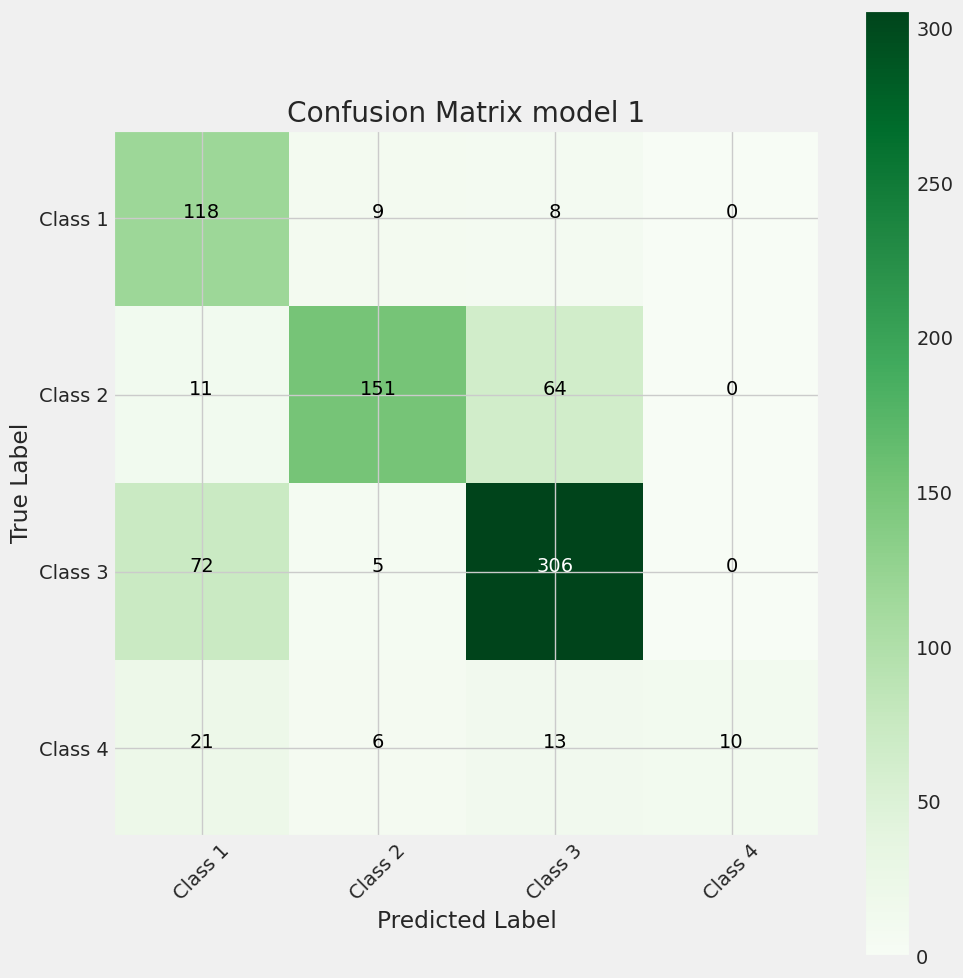

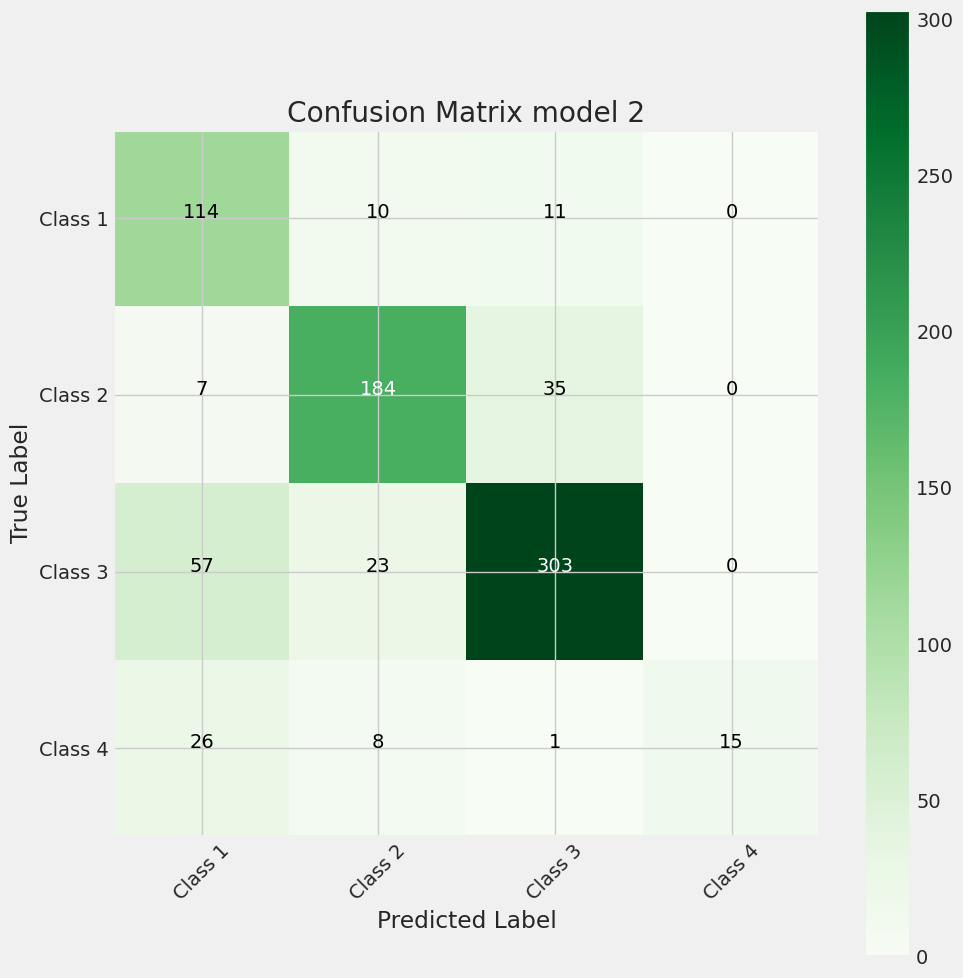

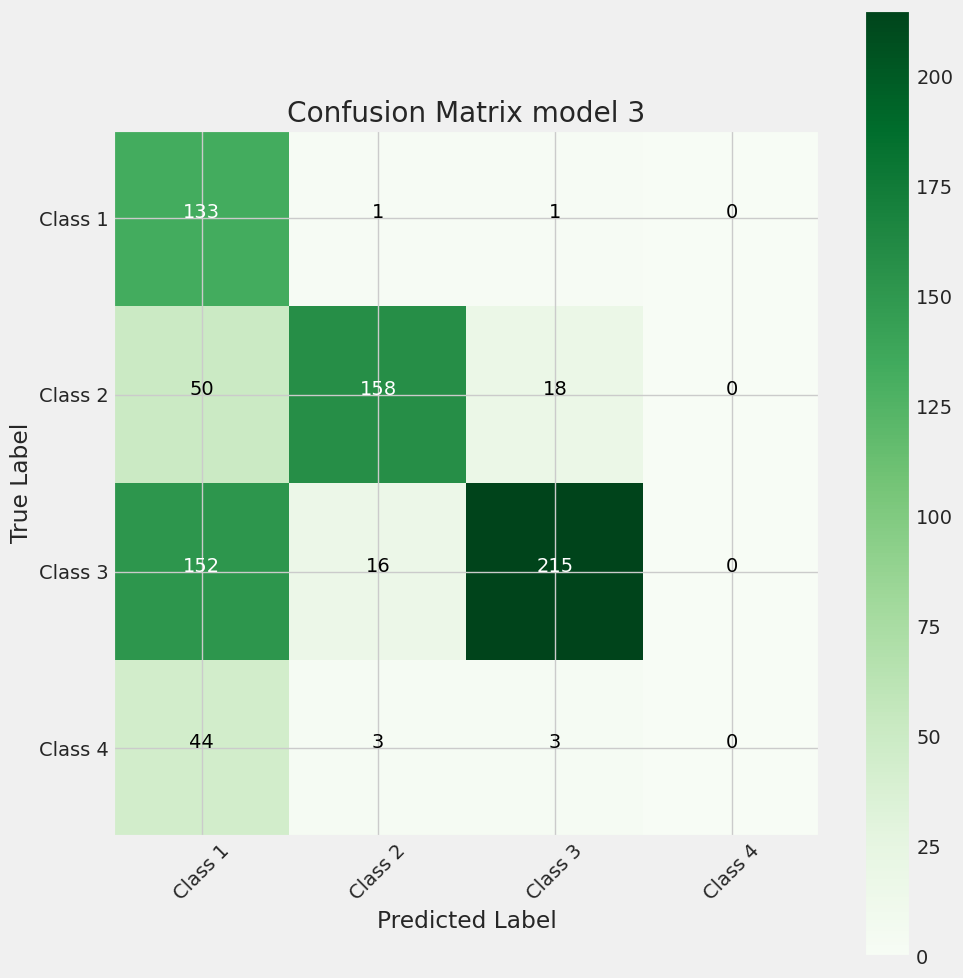

In [48]:
i =1
for model in models:
    print(f"===============Model {i}===============")
    y_pred = Preds[f"Model{i}"]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = [f'Class {i+1}' for i in range(4)]


    plot_confusion_matrix(cm=cm, classes=class_names, title=f'Confusion Matrix model {i}')

    # Classification report
    print(classification_report(y_test, y_pred, target_names= class_names))
    i+=1
    print("===============================")